EN2550 - Fundementals of Image Processing and Machine Vision

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

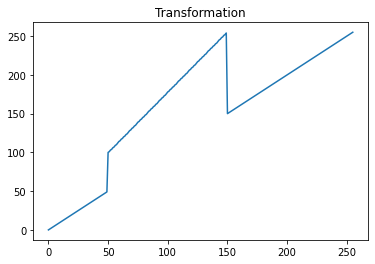

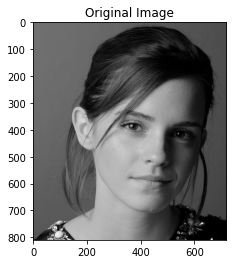

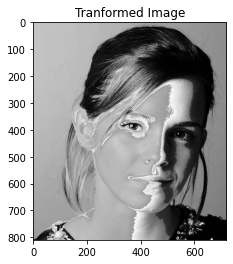

In [12]:
img_orig = cv.imread(r'./emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

t = np.arange(0,256,dtype=np.uint8)
t[:50] = np.linspace(0,50,50,endpoint=False)
t[50:150] = np.linspace(100,256,100,endpoint=False)
t[150:] = np.linspace(150,256,106,endpoint=False)

fig,ax = plt.subplots()
ax.plot(t)
plt.title("Transformation")

img_t = cv.LUT(img_orig,t)

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
plt.title("Original Image")
plt.show()

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img_orig)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
plt.title("Tranformed Image")
plt.show()

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img_t)
cv.waitKey(0)
cv.destroyAllWindows()

Question 2

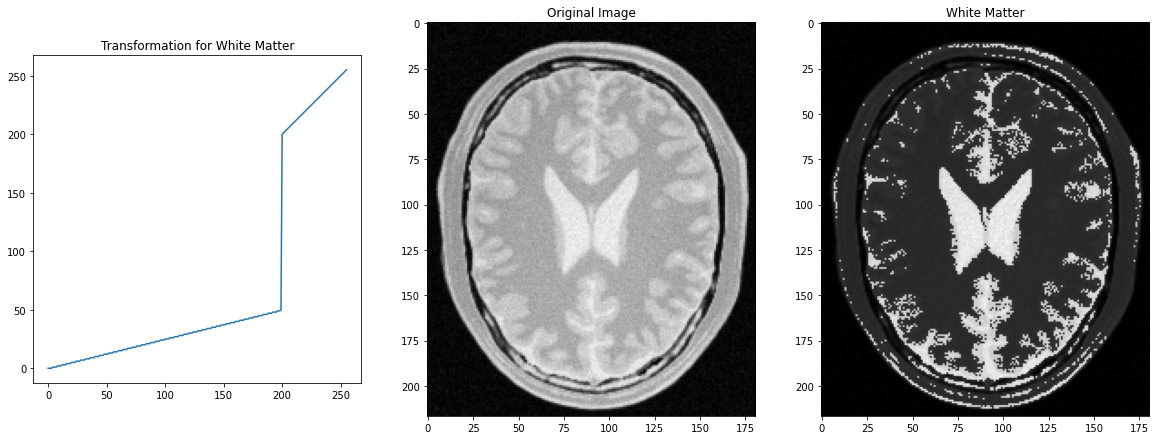

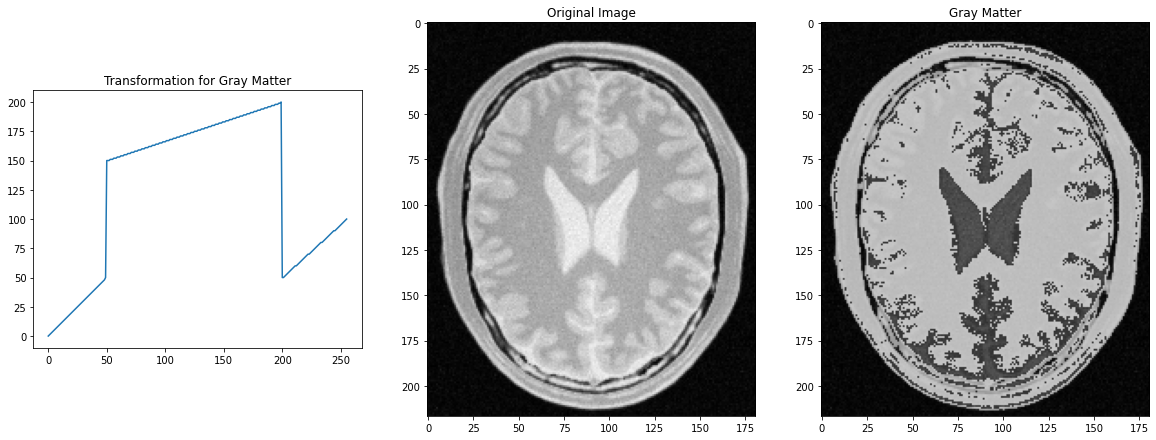

In [2]:
img_orig = cv.imread(r'./brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

### Part a - White Matter ###

tw = np.arange(0,256,dtype=np.uint8)
tw[:200]=np.linspace(0,50,200)
tw[200:256]=np.linspace(200,255,56)
img_t = cv.LUT(img_orig,tw)

fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tw)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for White Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("White Matter")
plt.show()

### Part b - Gray Matter ###

tg = np.arange(0,256,dtype=np.uint8)
tg[:50]=np.linspace(0,50,50)
tg[50:200]=np.linspace(150,200,150)
tg[200:]=np.linspace(50,100,56)
img_t = cv.LUT(img_orig,tg)

fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].plot(tg)
ax[0].set_aspect('equal')
ax[0].set_title("Transformation for Gray Matter")

ax[1].imshow(cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB))
ax[1].set_title("Original Image")

ax[2].imshow(cv.cvtColor(img_t, cv.COLOR_GRAY2RGB))
ax[2].set_title("Gray Matter")
plt.show()

Question 3

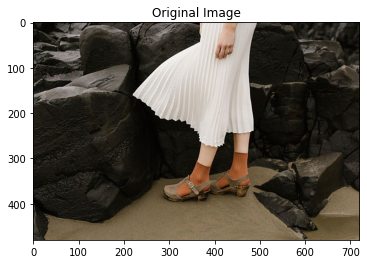

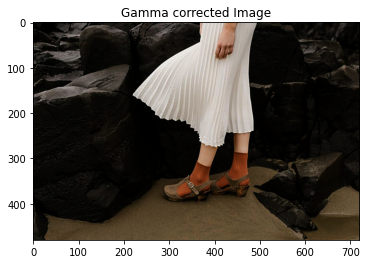

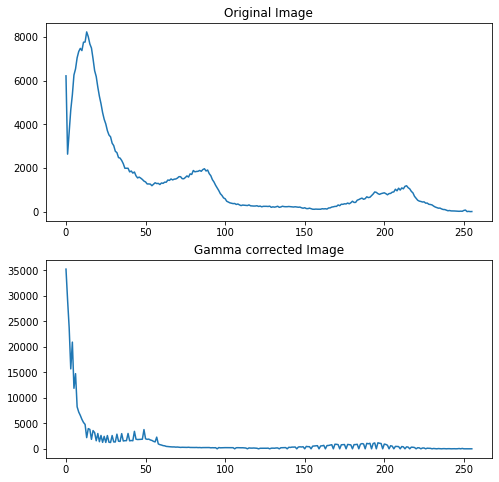

In [3]:
### Part a ###

f = cv.imread(r'./highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert f is not None

gamma = 1.5
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8') 
    
f_gamma = cv.LUT(f, table)

fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
    
plt.title("Original Image")
plt.show()
    
fig,ax = plt.subplots()
ax.imshow(cv.cvtColor(f_gamma, cv.COLOR_BGR2RGB))
plt.title("Gamma corrected Image")
plt.show()

cv.imshow('Image',f)
cv.waitKey(0)

cv.imshow('Image',f_gamma)
cv.waitKey(0)

cv.destroyAllWindows()

### Part b ###

hist_f = cv.calcHist([f],[0], None,[256],[0,256])
hist_f_gamma = cv.calcHist([f_gamma],[0], None,[256],[0,256])

fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].set_title("Original Image")
ax[0].plot(hist_f)
ax[1].set_title("Gamma corrected Image")
ax[1].plot(hist_f_gamma)
plt.show()
